In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# seaborn scheme 설정
plt.style.use('seaborn')
# 그래프의 폰트 설정
sns.set(font_scale=1.5) 
# 데이터셋의 missing data 쉽게 보여주기
import missingno as msno

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

- [참고] matplotlib style
  - https://tonysyu.github.io/raw_content/matplotlib-style-gallery/gallery.html

### 작업 내용
- 1) 데이터셋 확인
  - null data 와 같은 데이터를 확인 및 수정
- 2) 탐색적 데이터 분석(Exploratory Data Analysis)
  - 여러 feature들을 개별적으로 분석
  - feature들 간의 상관 관계 확인
  - 여러 시각화 도구들을 사용
- 3) Feature Engineering
  - 모델을 만들기 전, 모델 성능을 높이기 위한 feature들을 engineering
  - one-hot encoding, class로 나누기, text 데이터 처리 등
- 4) Model 만들기
  - sklearn을 사용하여 모델 만들기
  - tensorflow, pytorch 등 딥러닝 프레임워크 사용도 가능
- 5) 모델 학습 및 예측
  - train set 을 가지고 모델 학습
  - test set을 사용하여 prediction
- 6) 모델 평가
  - 학습된 모델에 대한 예측 성능 평가

## 1. Dataset 확인
- 데이터를 테이블화하여 다루는 것이 편리
- pandas를 사용
  - 간단한 통계적 분석부터 복잡한 처리들을 간단한 메소드를 사용하여 처리


In [9]:

df_train = pd.read_csv('C:/Users/sangkyu/git/kaggle/titanic/input/train.csv')
df_test = pd.read_csv('C:/Users/sangkyu/git/kaggle/titanic/input/train.csv')

In [10]:
# 데이터 셋 살펴보기
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
df_test.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


##### Features
- pclass : 클래스, Integer
- age : 나이, Integer
- sibsp : 형제와 배우자의 수, Integer
- parch : 부모와 아이의 수, Integer
- fare : 탑승료, Float
- survived : 생존여부, Integer (target label)


In [12]:
# 통계적 수치 보기
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [13]:
df_test.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### NULL 데이터 체크

In [14]:
# 학습 데이터 체크
for col in df_train.columns:
    print('column: {:>10}\t Percent of NULL value: {:.2f}%'.format(col, 
          100 * (df_train[col].isnull().sum() / df_train[col].shape[0])))


column: PassengerId	 Percent of NULL value: 0.00%
column:   Survived	 Percent of NULL value: 0.00%
column:     Pclass	 Percent of NULL value: 0.00%
column:       Name	 Percent of NULL value: 0.00%
column:        Sex	 Percent of NULL value: 0.00%
column:        Age	 Percent of NULL value: 19.87%
column:      SibSp	 Percent of NULL value: 0.00%
column:      Parch	 Percent of NULL value: 0.00%
column:     Ticket	 Percent of NULL value: 0.00%
column:       Fare	 Percent of NULL value: 0.00%
column:      Cabin	 Percent of NULL value: 77.10%
column:   Embarked	 Percent of NULL value: 0.22%


- Age(약 20%), Cabin(약 80%), Embarked(약 0.2%)의 null data 존재 확인

In [15]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [16]:
# 테스트 데이터 체크
for col in df_test.columns:
    print('column: {:>10}\t Percent of NULL value: {:.2f}%'.format(col, 
          100 * (df_test[col].isnull().sum() / df_test[col].shape[0])))

column: PassengerId	 Percent of NULL value: 0.00%
column:   Survived	 Percent of NULL value: 0.00%
column:     Pclass	 Percent of NULL value: 0.00%
column:       Name	 Percent of NULL value: 0.00%
column:        Sex	 Percent of NULL value: 0.00%
column:        Age	 Percent of NULL value: 19.87%
column:      SibSp	 Percent of NULL value: 0.00%
column:      Parch	 Percent of NULL value: 0.00%
column:     Ticket	 Percent of NULL value: 0.00%
column:       Fare	 Percent of NULL value: 0.00%
column:      Cabin	 Percent of NULL value: 77.10%
column:   Embarked	 Percent of NULL value: 0.22%


In [17]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


##### MSNO 라이브러리를 사용하여 null data 확인

In [18]:
df_train.shape

(891, 12)

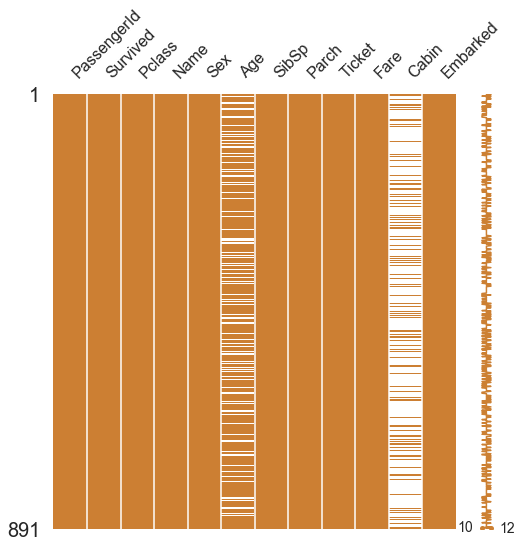

In [19]:
# null data 분포 확인
msno.matrix(df=df_train.iloc[:, :], figsize=(8, 8), color=(0.8, 0.5, 0.2))

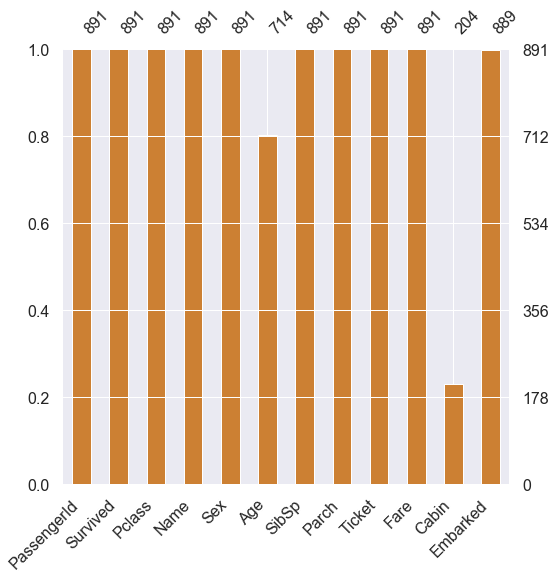

In [20]:
# null data 수로 확인
msno.bar(df=df_train.iloc[:, :], figsize=(8, 8), color=(0.8, 0.5, 0.2))

### Target Label 확인
- target label 이 어떤 분포를 가지고 있는지 확인
- binary classification 같은 경우, 1과 0의 분포에 따라 모델 평가 방법이 달라질 수 있음

In [21]:
df_train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

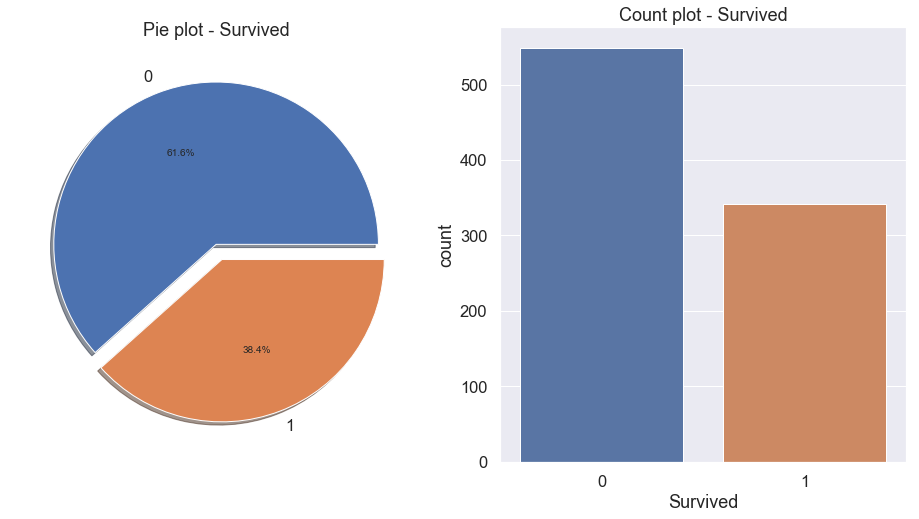

In [22]:
# 1행 2열 팔레트, 크기(세로:18, 가로:8)
f, ax = plt.subplots(1, 2, figsize=(16,8))

# 파이 차트로 그리기
# value_counts() 의 data type은 series이며,
# series 타입은 plot을 가짐
# plt.plot(df_train['Survived'].value_counts()) 은 df_train[..]...plot()과 동일
df_train['Survived'].value_counts().plot.pie(explode=[0, 0.1], 
                           autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Pie plot - Survived')
ax[0].set_ylabel('')

sns.countplot('Survived', data=df_train, ax=ax[1])
ax[1].set_title('Count plot - Survived')

plt.show()

- 38.4% 가 살아남음
- target label 의 분포가 어느 정도 균일(balanced)함


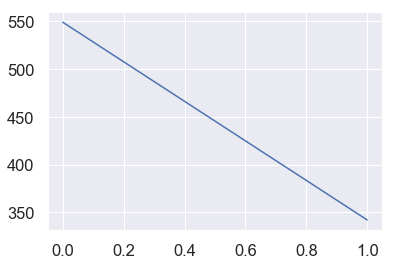

In [23]:
df_train['Survived'].value_counts().plot()

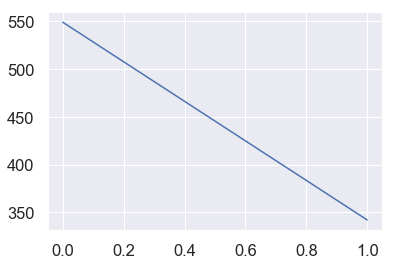

In [24]:
plt.plot(df_train['Survived'].value_counts())

- [참고] plotly

## 2. Exploratory Data Analysis (EDA, 탐색적 데이터 분석)

In [25]:
# 11개의 feature, 1개의 target label 
df_train.shape

(891, 12)

### Pclass (클래스)
- ordinal, 서수형 데이터, 카테고리형, 순서 있음
- pclass에 따른 생존률 차이 살펴보기
  - pandas의 group by 사용

In [26]:
# Pclass 별 항목 갯수
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).count()

,Survived
Pclass,
1,216
2,184
3,491


In [27]:
# Pclass별 생존자 수
# P1(136/216), P2(87/184), P3(119/491)
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).sum()  # mean()

,Survived
Pclass,
1,136
2,87
3,119


In [28]:
# crosstab 으로 확인
pd.crosstab(df_train['Pclass'], df_train['Survived'], 
            margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


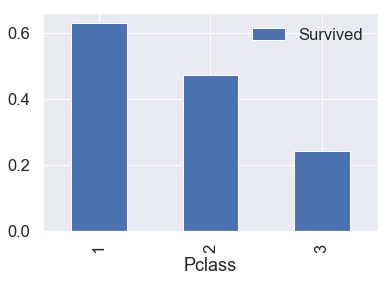

In [29]:
# 클래스별 생존률
# P1 : (136 / (80+136)) => 63%
df_train[['Pclass', 'Survived']].groupby(['Pclass'], 
             as_index=True).mean().sort_values(by='Survived', 
                                   ascending=False).plot.bar()

- Pclass가 좋을 수록 생존률이 높음

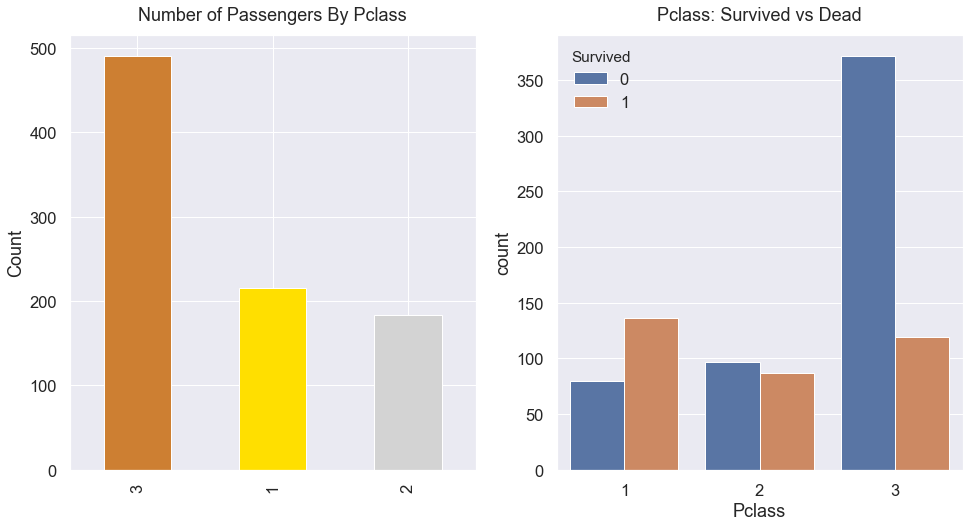

In [30]:
# label에 따른 갯수 확인
y_position = 1.02
f, ax = plt.subplots(1, 2, figsize=(16, 8))
df_train['Pclass'].value_counts().plot.bar(
    color=['#CD7F32','#FFDF00','#D3D3D3'], ax=ax[0])
ax[0].set_title('Number of Passengers By Pclass', y=y_position)
ax[0].set_ylabel('Count')
sns.countplot('Pclass', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Pclass: Survived vs Dead', y=y_position)
plt.show()

- 클래스가 높을 수록(1st class) 생존 확률이 높음
  - P1(63%), P2(48%), P3(25%)
- 생존에 Pclass가 큰 영향을 미친다고 생각할 수 있음
  - 모델을 만들 때, Pclass feature를 사용하는 것이 좋을 것이라 판단할 수 있음

### 성별(Sex)
- 성별로 생존률 확인
- pandas groupby와 seaborn countplot 사용


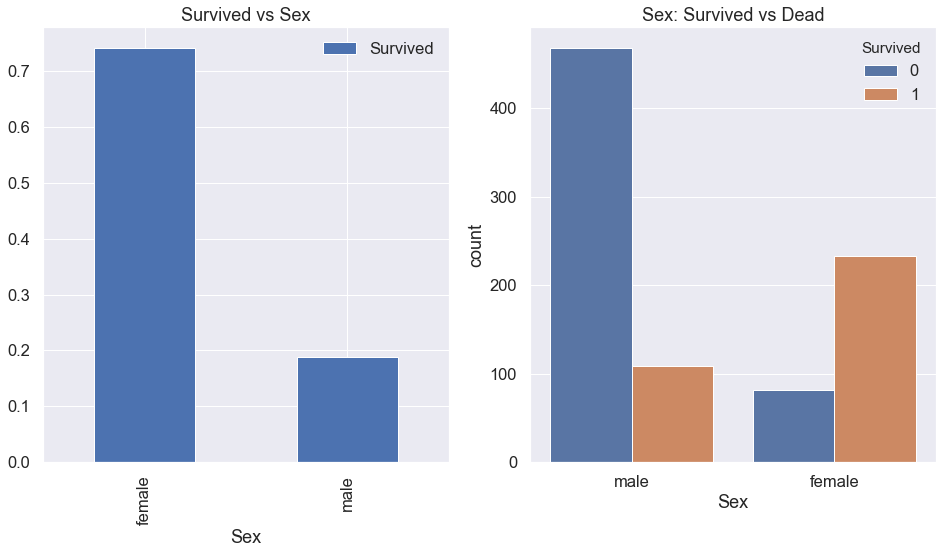

In [31]:
f, ax = plt.subplots(1, 2, figsize=(16, 8))
df_train[['Sex', 'Survived']].groupby(['Sex'], 
                          as_index=True).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Sex: Survived vs Dead')
plt.show()

- female(여성)이 생존할 확률이 높음

In [32]:
df_train[['Sex', 'Survived']].groupby(['Sex'], 
            as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [33]:
# crosstab 으로 확인
pd.crosstab(df_train['Sex'], df_train['Survived'], 
            margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


- Pclass와 마찬가지로, Sex도 예측 모델에 중요한 feature 임을 알 수 있음

### Pclass 와 Sex
- Pclass와 Sex 두 feature에 대한 생존 확률 확인

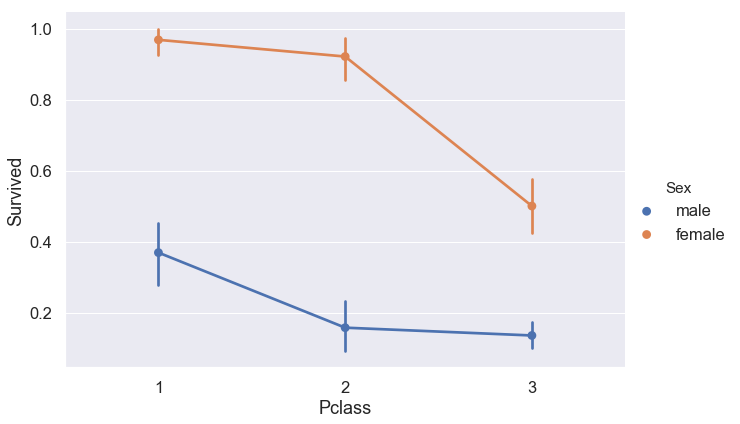

In [34]:
# 3개의 차원 데이터로 이루어진 그래프 그리기
sns.factorplot('Pclass', 'Survived', hue='Sex', data=df_train, 
               size=6, aspect=1.5)

- 모든 클래스에서 female이 생존할 확률이 male 보다 높음
- 남, 여 상관없이 클래스가 높을 수록 생존 확률이 높음

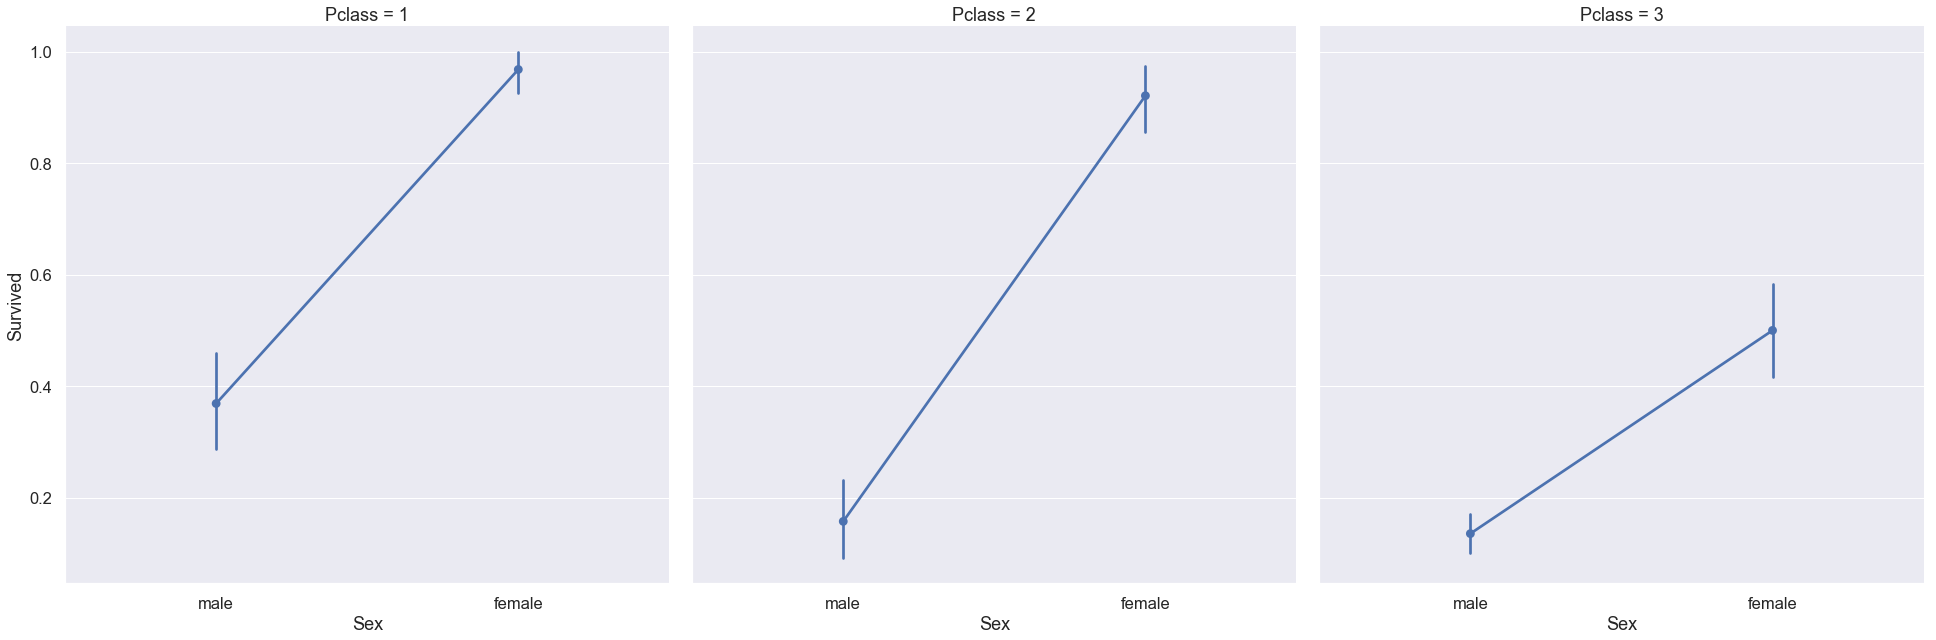

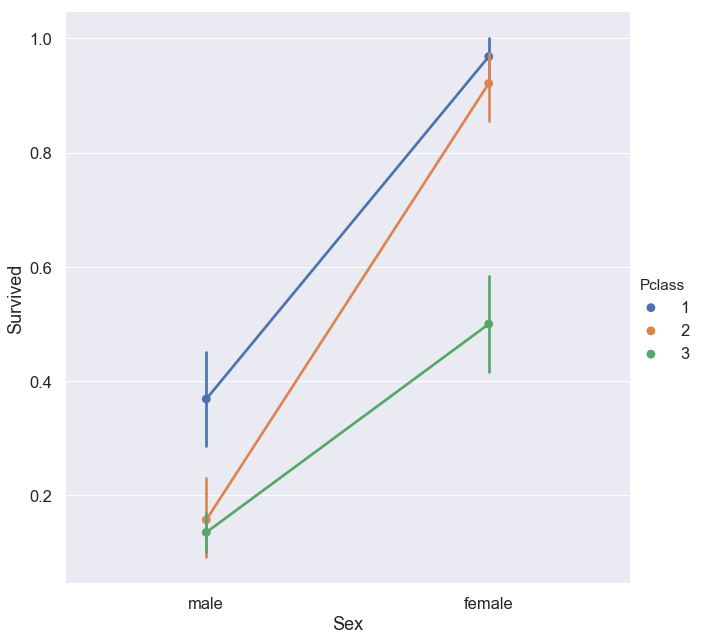

In [35]:
# cloumn 대신 hue 사용
sns.factorplot(x='Sex', y='Survived', col='Pclass',
              data=df_train, satureation=.5,
               size=9, aspect=1)
sns.factorplot(x='Sex', y='Survived', hue='Pclass',
              data=df_train, satureation=.5,
               size=9, aspect=1)

- [찾아보기] error bar

### Age
- 나이에 따른 생존 확률 확인

In [36]:
# 간단한 통계 보기
print('제일 나이 많은 탑승객 : {:.1f} Years'.format(df_train['Age'].max()))
print('제일 어린 탑승객 : {:.1f} Years'.format(df_train['Age'].min()))
print('탑승객 평균 나이 : {:.1f} Years'.format(df_train['Age'].mean()))

제일 나이 많은 탑승객 : 80.0 Years
제일 어린 탑승객 : 0.4 Years
탑승객 평균 나이 : 29.7 Years


In [37]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [38]:
df_train[df_train['Survived'] == 1]['Age'].isnull().sum()

52

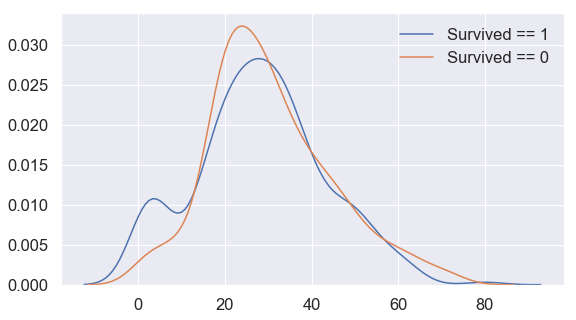

In [39]:
# 생존에 따른 Age의 히스토그램
# kdeplot()
fig, ax = plt.subplots(1, 1, figsize=(9, 5))
sns.kdeplot(df_train[df_train['Survived'] == 1]['Age'].dropna(), ax=ax)
sns.kdeplot(df_train[df_train['Survived'] == 0]['Age'].dropna(), ax=ax)
plt.legend(['Survived == 1', 'Survived == 0'])
plt.show()

- 나이가 어릴 수록 생존률이 높음

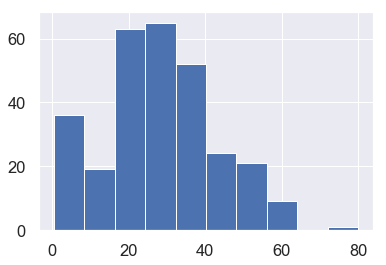

In [40]:
# 히스토그램 vs. kdeplot()
# kdeplot()이 부드럽게 그림
# (참고) 커널밀도추정 https://blog.naver.com/loiu870422/220660847923
df_train[df_train['Survived']==1]['Age'].hist()

In [41]:
# pandas indexing
df_train.iloc[0,:]

PassengerId                          1
Survived                             0
Pclass                               3
Name           Braund, Mr. Owen Harris
Sex                               male
Age                                 22
SibSp                                1
Parch                                0
Ticket                       A/5 21171
Fare                              7.25
Cabin                              NaN
Embarked                             S
Name: 0, dtype: object

In [42]:
for row in df_train.iterrows():
  break
row

(0, PassengerId                          1
 Survived                             0
 Pclass                               3
 Name           Braund, Mr. Owen Harris
 Sex                               male
 Age                                 22
 SibSp                                1
 Parch                                0
 Ticket                       A/5 21171
 Fare                              7.25
 Cabin                              NaN
 Embarked                             S
 Name: 0, dtype: object)

In [43]:
df_train['Survived'] == 1

0      False
1       True
2       True
3       True
4      False
5      False
6      False
7      False
8       True
9       True
10      True
11      True
12     False
13     False
14     False
15      True
16     False
17      True
18     False
19      True
20     False
21      True
22      True
23      True
24     False
25      True
26     False
27     False
28      True
29     False
       ...  
861    False
862     True
863    False
864    False
865     True
866     True
867    False
868    False
869     True
870    False
871     True
872    False
873    False
874     True
875     True
876    False
877    False
878    False
879     True
880     True
881    False
882    False
883    False
884    False
885    False
886    False
887     True
888    False
889     True
890    False
Name: Survived, Length: 891, dtype: bool

In [44]:
df_train[df_train['Survived']==1]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.00,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.00,1,0,237736,30.0708,NaN,C
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.00,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.00,0,0,113783,26.5500,C103,S
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.00,0,0,248706,16.0000,NaN,S
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C


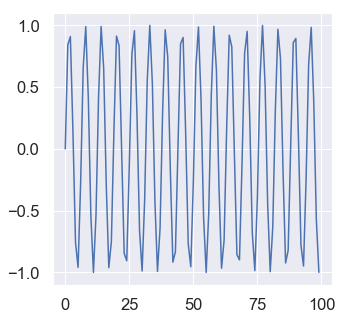

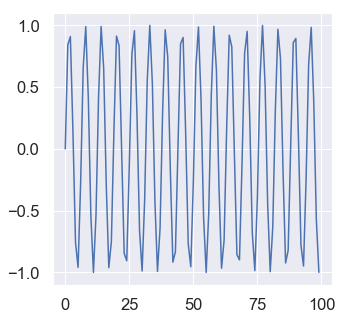

In [45]:
# figsize
# 아래 세 예제는 동일
#f = plt.figure(figsize=(10,10))
#f, ax = plt.subplots(1,1,figsize=(10,10))
#plt.figure(figsize=(10,10))
f, ax = plt.subplots(1,1,figsize=(5,5))
a = np.arange(100)
b = np.sin(a)
ax.plot(b)

plt.figure(figsize=(5,5))
plt.plot(b)

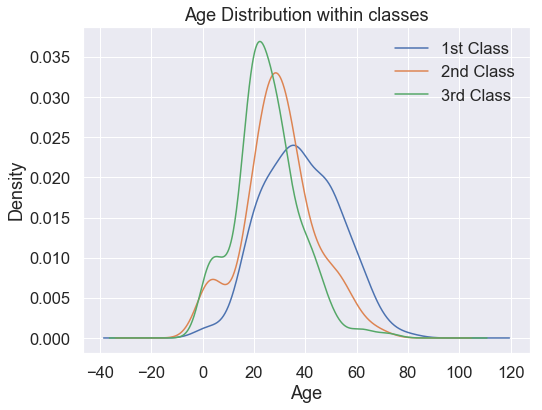

In [46]:
# Pclass와 Age 로 확인
plt.figure(figsize=(8, 6))
df_train['Age'][df_train['Pclass'] == 1].plot(kind='kde')
df_train['Age'][df_train['Pclass'] == 2].plot(kind='kde')
df_train['Age'][df_train['Pclass'] == 3].plot(kind='kde')

plt.xlabel('Age')
plt.title('Age Distribution within classes')
plt.legend(['1st Class', '2nd Class', '3rd Class'])

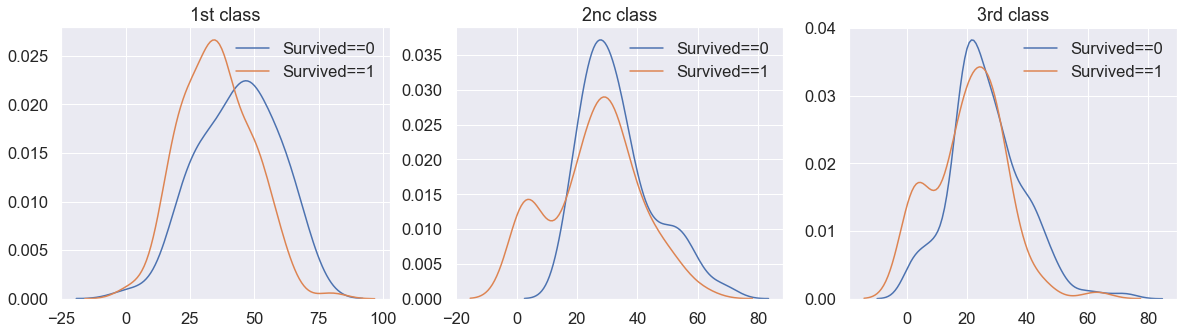

In [47]:
fig, ax = plt.subplots(1,3,figsize=(20,5))
sns.kdeplot(df_train[(df_train['Survived']==0) & (df_train['Pclass']==1)]['Age'], ax=ax[0])
sns.kdeplot(df_train[(df_train['Survived']==1) & (df_train['Pclass']==1)]['Age'], ax=ax[0])
ax[0].set_title('1st class')
ax[0].legend(['Survived==0', 'Survived==1'])   
sns.kdeplot(df_train[(df_train['Survived']==0) & (df_train['Pclass']==2)]['Age'], ax=ax[1])
sns.kdeplot(df_train[(df_train['Survived']==1) & (df_train['Pclass']==2)]['Age'], ax=ax[1])
ax[1].set_title('2nc class')
ax[1].legend(['Survived==0', 'Survived==1'])   
sns.kdeplot(df_train[(df_train['Survived']==0) & (df_train['Pclass']==3)]['Age'], ax=ax[2])
sns.kdeplot(df_train[(df_train['Survived']==1) & (df_train['Pclass']==3)]['Age'], ax=ax[2])
ax[2].set_title('3rd class')
ax[2].legend(['Survived==0', 'Survived==1'])                               
plt.show()


- Class가 높을 수록 나이 많은 사람의 비중이 커짐

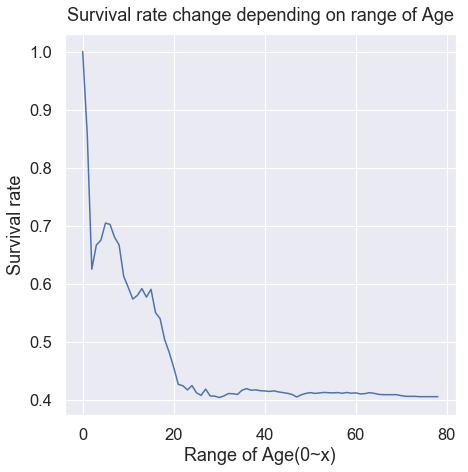

In [48]:
# 나이 범위에 따른 생존률
cummulate_survival_ratio = []
for i in range(1, 80):
    cummulate_survival_ratio.append(
        df_train[df_train['Age'] < i]['Survived'].sum() / 
        len(df_train[df_train['Age'] < i]['Survived']))
    
plt.figure(figsize=(7, 7))
plt.plot(cummulate_survival_ratio)
plt.title('Survival rate change depending on range of Age', y=1.02)
plt.ylabel('Survival rate')
plt.xlabel('Range of Age(0~x)')
plt.show()

- 나이가 어릴 수록 생존 확률이 높음
- Age는 중요한 feature 임을 알 수 있음

### Pclass, Sex, Age
- Pclass, Sex, Age 세 개의 feature에 대한 시각화
- seaborn violinplot 사용
  - x축 : 나누어 보고 싶은 case (Pclass, Sex)
  - y축 : 보고 싶은 distribution (Age)

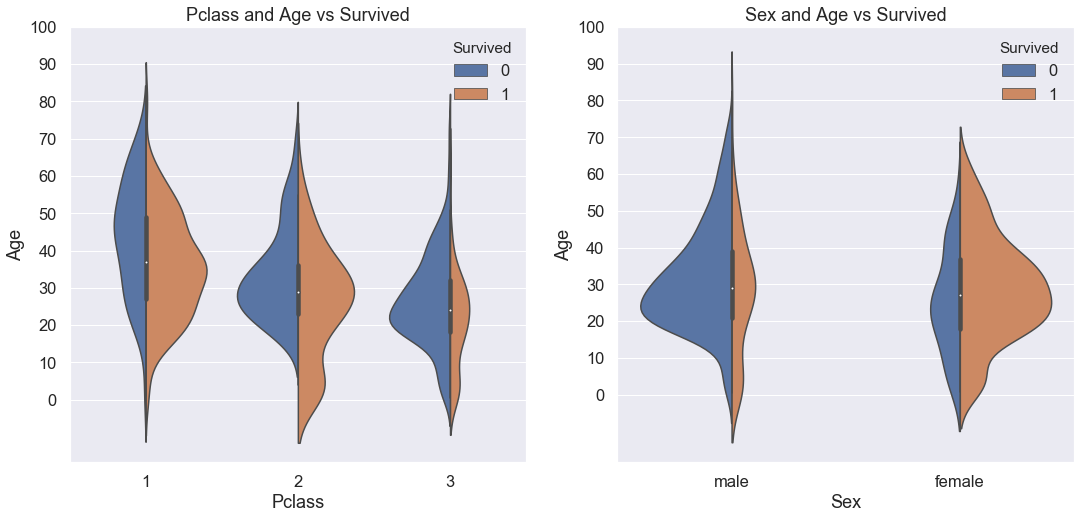

In [49]:
# scale='count', scale='area'
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.violinplot("Pclass","Age", hue="Survived", data=df_train, scale='count', 
               split=True,ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot("Sex","Age", hue="Survived", data=df_train, scale='count', 
               split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

- 왼쪽 그림: Pclass 별로 Age의 분포가 어떻게 다른지, 생존 여부에 따라 구분한 그래프
- 오른쪽 그림: Sex, Age에 따른 생존 여부
- 모든 클래스에서 나이가 어릴 수록 생존률이 높음
- 오른쪽 그림에서, female 이 생존률이 높음
- 여성과 아이를 먼저 챙긴 것을 알 수 있음

### Embarked
- 탑승한 항구에 따른 생존률 확인

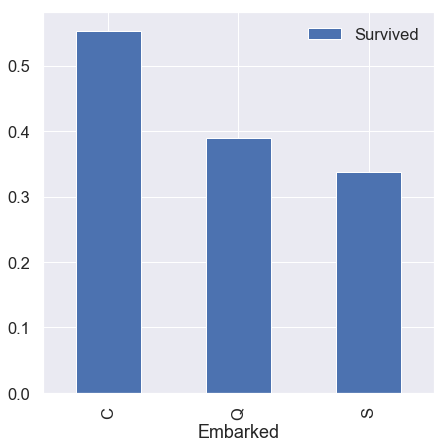

In [50]:
f, ax = plt.subplots(1, 1, figsize=(7, 7))
df_train[['Embarked', 'Survived']].groupby(['Embarked'], 
              as_index=True).mean().sort_values(by='Survived', 
                                      ascending=False).plot.bar(ax=ax)

- 생존률이 비슷

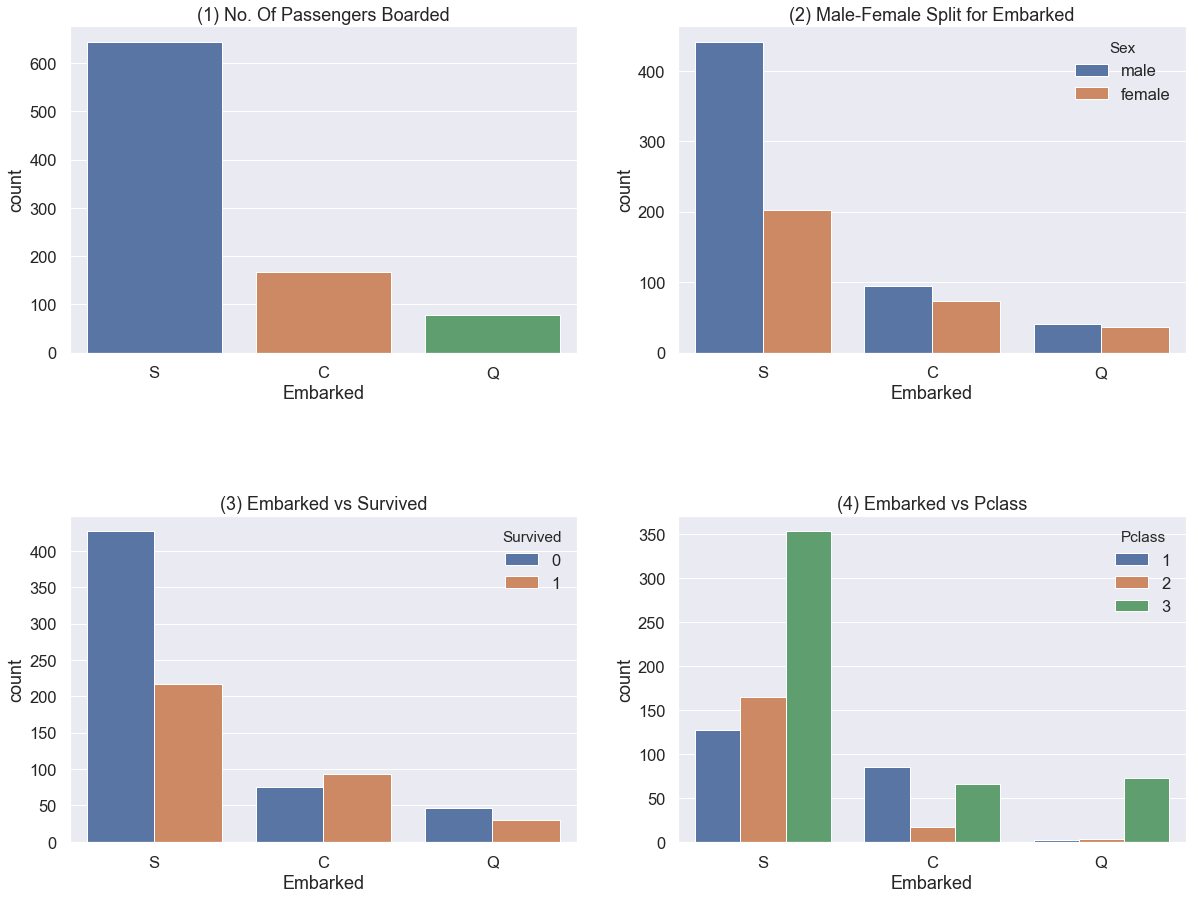

In [51]:
# 다른 feature로 split하여 확인
f,ax=plt.subplots(2, 2, figsize=(20,15))

sns.countplot('Embarked', data=df_train, ax=ax[0,0])
ax[0,0].set_title('(1) No. Of Passengers Boarded')

sns.countplot('Embarked', hue='Sex', data=df_train, ax=ax[0,1])
ax[0,1].set_title('(2) Male-Female Split for Embarked')

sns.countplot('Embarked', hue='Survived', data=df_train, ax=ax[1,0])
ax[1,0].set_title('(3) Embarked vs Survived')

sns.countplot('Embarked', hue='Pclass', data=df_train, ax=ax[1,1])
ax[1,1].set_title('(4) Embarked vs Pclass')

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

- Figure 1: S에서 가장 많은 사람이 탑승
- Figure 2: C와 Q는 남녀 비율이 비슷, S는 남자가 더 많음
- Figure 3: S가 생존확률이 가장 낮음
- Figure 4: C가 생존 확률이 높음. 클래스가 높은 사람이 많이 탄 이유. S는 3rd class가 많아서 생존 확률이 낮음

### Family
- SibSp(형제 자매)
- Parch(부모, 자녀)

In [52]:
# 새로운 컬럼(Family) 추가
# series 타입은 서로 더할 수 있음
# 자신을 포함하기 위해 1을 더함
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1 
df_test['FamilySize'] = df_test['SibSp'] + df_test['Parch'] + 1 

print("Maximum size of Family: ", df_train['FamilySize'].max())
print("Minimum size of Family: ", df_train['FamilySize'].min())

Maximum size of Family:  11
Minimum size of Family:  1


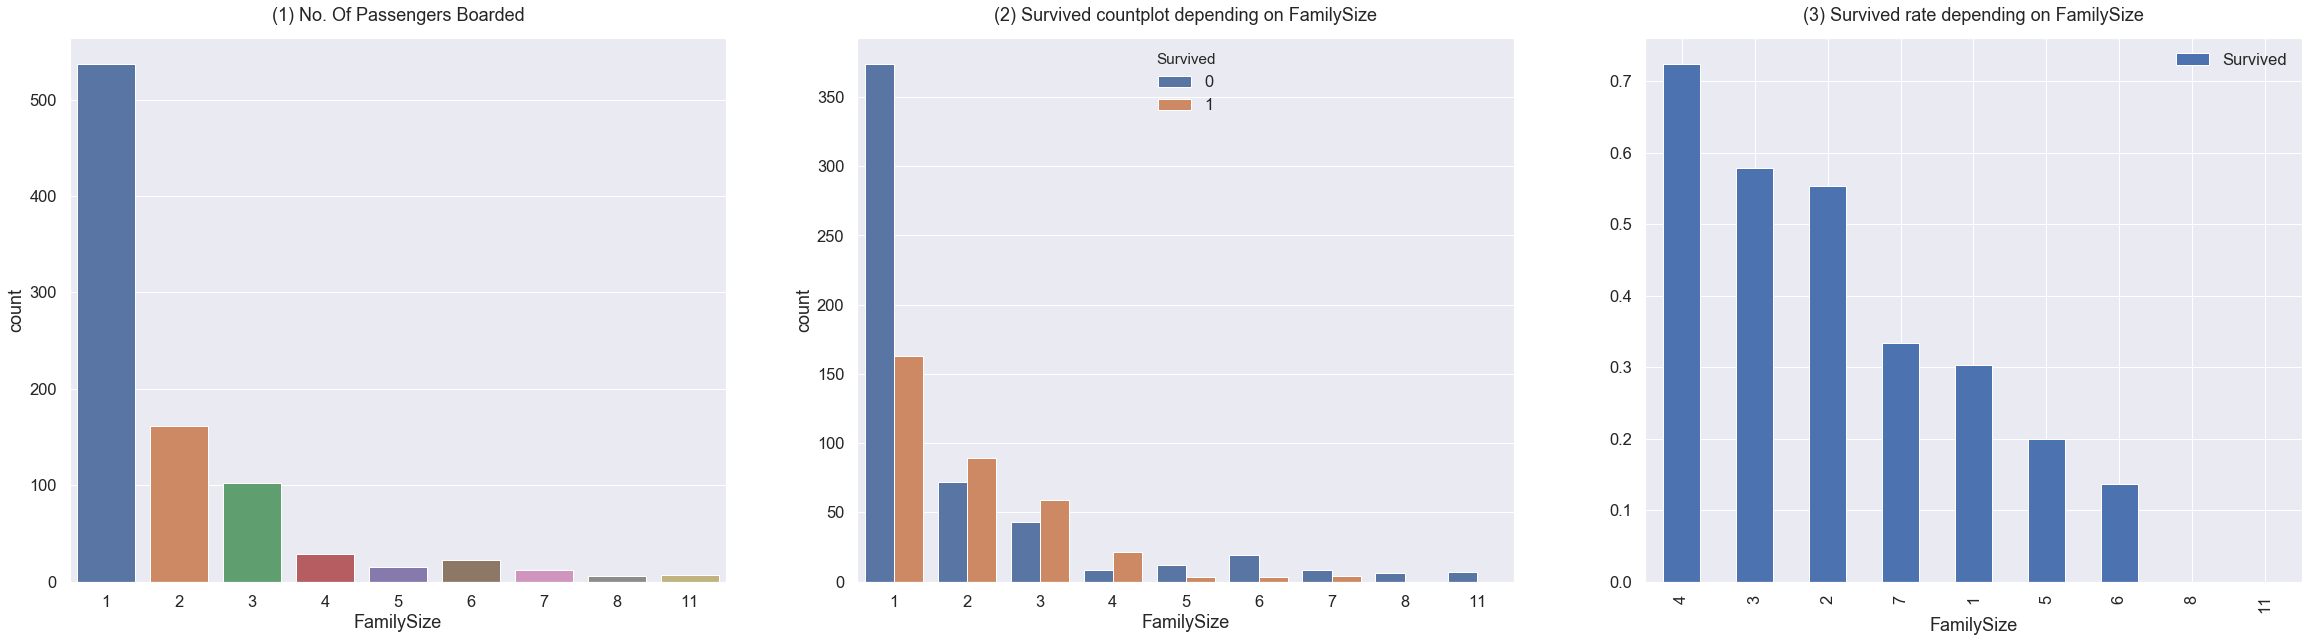

In [53]:
# Family 크기와 생존 관계
f,ax=plt.subplots(1, 3, figsize=(40,10))

sns.countplot('FamilySize', data=df_train, ax=ax[0])
ax[0].set_title('(1) No. Of Passengers Boarded', y=1.02)

sns.countplot('FamilySize', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('(2) Survived countplot depending on FamilySize',  y=1.02)

df_train[['FamilySize', 'Survived']].groupby(['FamilySize'], 
                    as_index=True).mean().sort_values(by='Survived', 
                                         ascending=False).plot.bar(ax=ax[2])
ax[2].set_title('(3) Survived rate depending on FamilySize',  y=1.02)

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

- Figure 1: 가족 크기는 1 ~ 11. 대부분 1명, 그 다음은 2~4명
- Figure 2, 3: 
  - 가족이 4명인 경우 생존 확률이 가장 높음
  - 가족 수가 많아질 수록 생존 확률이 낮아짐
  - 가족 수가 너무 작거나, 너무 커도 생존 확률이 낮음
  - 가족 수 3~4명이 생존 확률이 높음

### Fare (탑승 요금)
- continuous feature


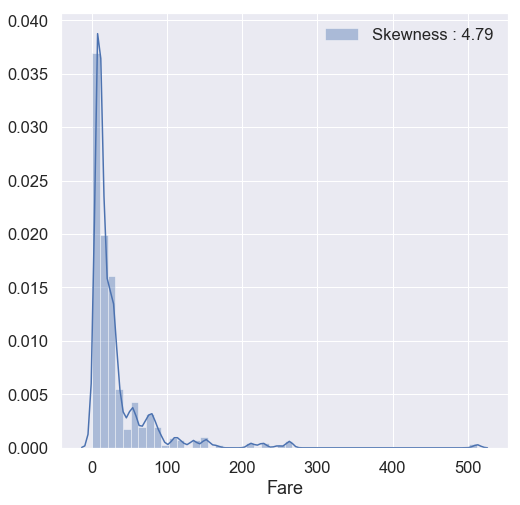

In [54]:
# histogram
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
g = sns.distplot(df_train['Fare'], color='b', 
                 label='Skewness : {:.2f}'.format(df_train['Fare'].skew()), ax=ax)
g = g.legend(loc='best')

- distribution이 비대칭 (high skewness)
  - 이대로 모델에 넣어 줄 경우, 모델이 잘못 학습할 수 있음
  - outlier에 민감하게 반응한다면 예측시에 좋지 못한 결과를 부름
- outlier의 영향을 줄이기 위해 Fare에 log 적용
- pandas DataFrame의 특정 컬럼에 공통된 작업(함수)을 적용하는 경우,  map 또는 apply 사용


In [55]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
FamilySize     891 non-null int64
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


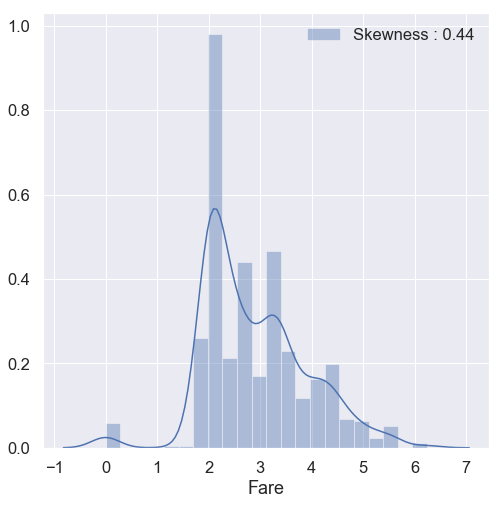

In [56]:
# NULL값 치환
df_train.loc[df_train.Fare.isnull(), 'Fare'] = df_train['Fare'].mean()
df_test.loc[df_test.Fare.isnull(), 'Fare'] = df_test['Fare'].mean()

# log 적용 (편향된 데이터 보정)
df_train['Fare'] = df_train['Fare'].map(lambda i: np.log(i) if i>0 else 0)
df_test['Fare'] = df_test['Fare'].map(lambda i: np.log(i) if i>0 else 0)

fig, ax = plt.subplots(1, 1, figsize=(8, 8))
g = sns.distplot(df_train['Fare'], color='b', 
            label='Skewness : {:.2f}'.format(df_train['Fare'].skew()), ax=ax)
g = g.legend(loc='best')

- log를 취하니, 비대칭성이 많이 사라짐
- feature engineering 적용
- 모델을 학습시키고, 모델의 성능을 높이기 위해 feature 들에 여러 조작을 가하거나, 새로운 feature를 추가하는 작업

### Cabin
- NaN 이 약 80%
- 생존에 영향을 미칠 중요한 정보를 얻어내기는 쉽지 않음
- 모델에 포함하지 않는 것이 좋음

In [57]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,1.981001,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.266662,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.070022,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.972177,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.085672,NaN,S,1


### Ticket
- 다양한 문자열이 많음
- 모델에 적용하기 위해서 다양한 아이디어 필요

In [58]:
df_train['Ticket'].value_counts()


CA. 2343             7
347082               7
1601                 7
CA 2144              6
347088               6
3101295              6
S.O.C. 14879         5
382652               5
17421                4
113760               4
19950                4
4133                 4
W./C. 6608           4
LINE                 4
113781               4
PC 17757             4
2666                 4
349909               4
347077               4
248727               3
PC 17582             3
PC 17760             3
F.C.C. 13529         3
371110               3
230080               3
345773               3
PC 17755             3
C.A. 34651           3
SC/Paris 2123        3
347742               3
                    ..
229236               1
315086               1
SC/PARIS 2131        1
330919               1
STON/O2. 3101283     1
384461               1
220367               1
112059               1
A/4 45380            1
315084               1
2672                 1
347089               1
7545       

- ticket number 가 매우 다양함
- 일단, 제외
- [참고] 참고한 사이트
  - https://www.kaggle.com/arthurtok/introduction-to-ensembling-stacking-in-python, https://www.kaggle.com/startupsci/titanic-data-science-solutions, https://www.kaggle.com/ash316/eda-to-prediction-dietanic, https://www.kaggle.com/yassineghouzam/titanic-top-4-with-ensemble-modeling 

## 3. Feature Engineering
- dataset에 존재하는 null data 채우기
- null data를 포함하는 feature의 statistics를 참고하거나, 다른 아이디어 필요
- 모델의 성능에 영향을 주는 중요한 작업
- train 뿐만 아니라 test dataset에도 동일하게 적용해야 함

### Age의 NULL 처리
- Age에는 null 데이터가 177개나 존재
- title과 statistics를 사용하여 채워보기
  - Miss, Mrr, Mrs 사용
- pandas의 str.extract()를 사용하여 title 추출 (정규표현식 사용)

In [59]:
df_train['Age'].isnull().sum()

177

In [60]:
df_train['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
5                                       Moran, Mr. James
6                                McCarthy, Mr. Timothy J
7                         Palsson, Master. Gosta Leonard
8      Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                    Nasser, Mrs. Nicholas (Adele Achem)
10                       Sandstrom, Miss. Marguerite Rut
11                              Bonnell, Miss. Elizabeth
12                        Saundercock, Mr. William Henry
13                           Andersson, Mr. Anders Johan
14                  Vestrom, Miss. Hulda Amanda Adolfina
15                      Hewlett, Mrs. (Mary D Kingcome) 
16                                  Rice, Master. Eugene
17                          Wil

In [61]:
df_train['Name'].str.extract('([A-Za-z]+)\.')

,0
0,Mr
1,Mrs
2,Miss
3,Mrs
4,Mr
5,Mr
6,Mr
7,Master
8,Mrs
9,Mrs


In [62]:
# initial 항목으로 추출
df_train['Initial']=0
df_train['Initial']= df_train.Name.str.extract('([A-Za-z]+)\.') 
    
df_test['Initial']=0
df_test['Initial']= df_test.Name.str.extract('([A-Za-z]+)\.')

In [63]:
# Sex와 Initial에 대한 crosstab 확인
pd.crosstab(df_train['Initial'], df_train['Sex']).T.style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [64]:
# 위 테이블을 참고하여,
# initial 치환
df_train['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess',
                          'Jonkheer','Col','Rev','Capt','Sir','Don', 'Dona'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other',
                       'Other','Other','Mr','Mr','Mr', 'Mr'],inplace=True)

df_test['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess',
                          'Jonkheer','Col','Rev','Capt','Sir','Don', 'Dona'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other',
                         'Other','Other','Mr','Mr','Mr', 'Mr'],inplace=True)

In [65]:
pd.crosstab(df_train['Initial'], df_train['Sex']).T.style.background_gradient(cmap='summer_r')

Initial,Master,Miss,Mr,Mrs,Other
Sex,,,,,
female,0,186,1,127,0
male,40,0,528,0,9


In [66]:
df_train.groupby('Initial').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize
Initial,,,,,,,,
Master,414.975000,0.575000,2.625000,4.574167,2.300000,1.375000,3.340710,4.675000
Miss,411.741935,0.704301,2.284946,21.860000,0.698925,0.537634,3.123713,2.236559
Mr,455.880907,0.162571,2.381853,32.739609,0.293006,0.151229,2.651507,1.444234
Mrs,456.393701,0.795276,1.984252,35.981818,0.692913,0.818898,3.443751,2.511811
Other,564.444444,0.111111,1.666667,45.888889,0.111111,0.111111,2.641605,1.222222


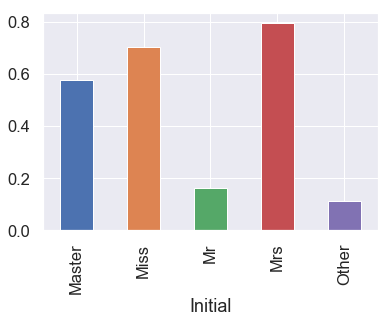

In [67]:
# 생존률 확인
df_train.groupby('Initial')['Survived'].mean().plot.bar()

- 어린 아이(Master)와 여성과 관계 있는 Miss, Mrs가 생존률이 높음

#### train, test 전체 셋을 사용하여 Age의 null 값 처리
- pandas의 concat을 이용하여 dataframe을 합침


In [68]:
df_train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Initial
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,1.981001,NaN,S,2,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.266662,C85,C,2,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.070022,NaN,S,1,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.972177,C123,S,2,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.085672,NaN,S,1,Mr


In [69]:
df_all = pd.concat([df_train, df_test])
df_all.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Initial
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,1.981001,NaN,S,2,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.266662,C85,C,2,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.070022,NaN,S,1,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.972177,C123,S,2,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.085672,NaN,S,1,Mr
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,2.135148,NaN,Q,1,Mr
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,3.948596,E46,S,1,Mr
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,3.048088,NaN,S,5,Master
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,2.409941,NaN,S,3,Mrs
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,3.403555,NaN,C,2,Mrs


In [70]:
df_all.tail(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Initial
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,2.564949,NaN,S,1,Other
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,3.401197,B42,S,1,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,3.154870,NaN,S,4,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,3.401197,C148,C,1,Mr
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,2.047693,NaN,Q,1,Mr


In [71]:
df_all.reset_index(drop=True)
df_all.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Initial
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,1.981001,NaN,S,2,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.266662,C85,C,2,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.070022,NaN,S,1,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.972177,C123,S,2,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.085672,NaN,S,1,Mr


In [72]:
df_all.groupby('Initial').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize
Initial,,,,,,,,
Master,414.975000,0.575000,2.625000,4.574167,2.300000,1.375000,3.340710,4.675000
Miss,411.741935,0.704301,2.284946,21.860000,0.698925,0.537634,3.123713,2.236559
Mr,455.880907,0.162571,2.381853,32.739609,0.293006,0.151229,2.651507,1.444234
Mrs,456.393701,0.795276,1.984252,35.981818,0.692913,0.818898,3.443751,2.511811
Other,564.444444,0.111111,1.666667,45.888889,0.111111,0.111111,2.641605,1.222222


- Age의 평균을 이용하여 Null 값 채우기
  - Mr인 경우, Age 값을 33으로 치환
- loc + boolean + column을 사용하여 값을 치환하는 방법
- [참고] 다른 방법 참고:
  - https://www.kaggle.com/yassineghouzam/titanic-top-4-with-ensemble-modeling

In [73]:
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Mr'),'Age']=33
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Mrs'),'Age']=37
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Master'),'Age']=5
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Miss'),'Age']=22
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Other'),'Age']=45

df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Mr'),'Age']=33
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Mrs'),'Age']=37
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Master'),'Age']=5
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Miss'),'Age']=22
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Other'),'Age']=45

In [74]:
df_train['Age'].isnull().sum()

0

In [75]:
df_test['Age'].isnull().sum()

0

#### Embarked의 Null 값 처리
- null 값이 2개 있으며, S에서 탑승객이 가장 많음므로 null을 S로 채움
- dataframe의 fillna() 사용

In [76]:
df_train['Embarked'].isnull().sum()

2

In [77]:
df_train.shape

(891, 14)

In [78]:
df_train['Embarked'].fillna('S', inplace=True)

### Age 변환
- continus 값을 categorical 값으로 변환
  - 정보 손실이 있을 수 있으므로 주의가 필요
- Age를 몇 개의 group으로 나누어서 category화 시킴
- dataframe의 loc 또는 apply() 사용

In [79]:
df_train['Age_cat'] = 0

df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Initial,Age_cat
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,1.981001,NaN,S,2,Mr,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.266662,C85,C,2,Mrs,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.070022,NaN,S,1,Miss,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.972177,C123,S,2,Mrs,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.085672,NaN,S,1,Mr,0


In [80]:
# loc 이용
# 10살 간격으로 나누기
df_train['Age_cat'] = 0
df_train.loc[df_train['Age'] < 10, 'Age_cat'] = 0
df_train.loc[(10 <= df_train['Age']) & (df_train['Age'] < 20), 'Age_cat'] = 1
df_train.loc[(20 <= df_train['Age']) & (df_train['Age'] < 30), 'Age_cat'] = 2
df_train.loc[(30 <= df_train['Age']) & (df_train['Age'] < 40), 'Age_cat'] = 3
df_train.loc[(40 <= df_train['Age']) & (df_train['Age'] < 50), 'Age_cat'] = 4
df_train.loc[(50 <= df_train['Age']) & (df_train['Age'] < 60), 'Age_cat'] = 5
df_train.loc[(60 <= df_train['Age']) & (df_train['Age'] < 70), 'Age_cat'] = 6
df_train.loc[70 <= df_train['Age'], 'Age_cat'] = 7

df_test['Age_cat'] = 0
df_test.loc[df_test['Age'] < 10, 'Age_cat'] = 0
df_test.loc[(10 <= df_test['Age']) & (df_test['Age'] < 20), 'Age_cat'] = 1
df_test.loc[(20 <= df_test['Age']) & (df_test['Age'] < 30), 'Age_cat'] = 2
df_test.loc[(30 <= df_test['Age']) & (df_test['Age'] < 40), 'Age_cat'] = 3
df_test.loc[(40 <= df_test['Age']) & (df_test['Age'] < 50), 'Age_cat'] = 4
df_test.loc[(50 <= df_test['Age']) & (df_test['Age'] < 60), 'Age_cat'] = 5
df_test.loc[(60 <= df_test['Age']) & (df_test['Age'] < 70), 'Age_cat'] = 6
df_test.loc[70 <= df_test['Age'], 'Age_cat'] = 7

In [81]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Initial,Age_cat
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,1.981001,NaN,S,2,Mr,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.266662,C85,C,2,Mrs,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.070022,NaN,S,1,Miss,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.972177,C123,S,2,Mrs,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.085672,NaN,S,1,Mr,3


In [82]:
# apply() 함수 사용한 방법
def category_age(x):
    if x < 10:
        return 0
    elif x < 20:
        return 1
    elif x < 30:
        return 2
    elif x < 40:
        return 3
    elif x < 50:
        return 4
    elif x < 60:
        return 5
    elif x < 70:
        return 6
    else:
        return 7    
    
df_train['Age_cat_2'] = df_train['Age'].apply(category_age)


In [83]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Initial,Age_cat,Age_cat_2
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,1.981001,NaN,S,2,Mr,2,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.266662,C85,C,2,Mrs,3,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.070022,NaN,S,1,Miss,2,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.972177,C123,S,2,Mrs,3,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.085672,NaN,S,1,Mr,3,3


In [84]:
# 두 가지 방법의 비교
# all() : 모두 True 일 때, True
# any() : 하나라도 True이면 True
(df_train['Age_cat'] == df_train['Age_cat_2']).all()

True

In [85]:
# Age 컬럼 삭제
# axis=1
df_train.drop(['Age', 'Age_cat_2'], axis=1, inplace=True)
df_test.drop(['Age'], axis=1, inplace=True)

### Initial 변경
- Mr, Mrs, Miss, Master, Other 로 구성
- 카테고리로 표현되어져 있는 데이터를 컴퓨터가 인식할 수 있도록 수치화
- map() 사용

In [86]:
df_train.Initial.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Other'], dtype=object)

In [87]:
df_train['Initial'] = df_train['Initial'].map(
    {'Master': 0, 'Miss': 1, 'Mr': 2, 'Mrs': 3, 'Other': 4})
df_test['Initial'] = df_test['Initial'].map(
    {'Master': 0, 'Miss': 1, 'Mr': 2, 'Mrs': 3, 'Other': 4})
df_train.Initial.unique() 

array([2, 3, 1, 0, 4], dtype=int64)

### Embarked 변경
- S, C, Q로 구성

In [88]:
df_train['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [89]:
df_train['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [90]:
df_train['Embarked'] = df_train['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})
df_test['Embarked'] = df_test['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

In [91]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Initial,Age_cat
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,1.981001,NaN,2,2,2,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,4.266662,C85,0,2,3,3
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,2.070022,NaN,2,1,1,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,3.972177,C123,2,2,3,3
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,2.085672,NaN,2,1,2,3


In [92]:
# null 확인
df_train['Embarked'].isnull().any()

False

### Sex 변경
- male, female 로 구성

In [93]:
df_train['Sex'].unique()

array(['male', 'female'], dtype=object)

In [94]:
df_train['Sex'] = df_train['Sex'].map({'female': 0, 'male': 1})
df_test['Sex'] = df_test['Sex'].map({'female': 0, 'male': 1})

In [95]:
df_train['Sex'].unique()

array([1, 0], dtype=int64)

#### Pearson Correlation
- feature 들 간의 상관 관계 알아보기
- (-1, 1) 사이의 값
  - -1로 갈수록 음의 상관 관계
  - 1로 갈수록 양의 상관 관계
  - 0 : 상관 관계가 없음
- matrix 형태의 heatmap plot 사용

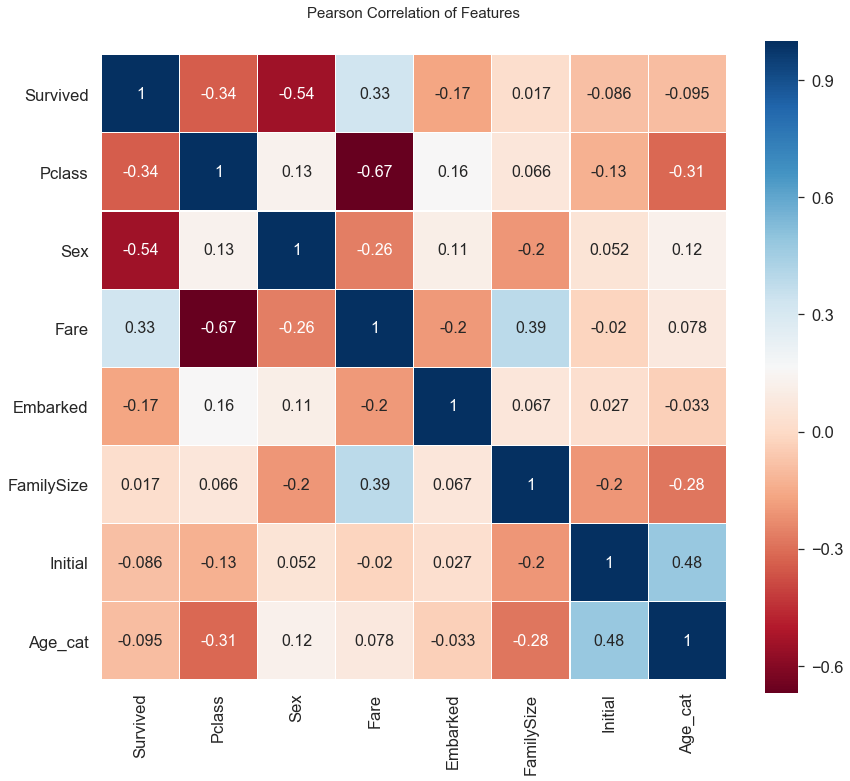

In [96]:
heatmap_data = df_train[['Survived', 'Pclass', 'Sex', 'Fare', 
                         'Embarked', 'FamilySize', 'Initial', 'Age_cat']] 

colormap = plt.cm.RdBu
plt.figure(figsize=(14, 12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(heatmap_data.astype(float).corr(), linewidths=0.1, vmax=1.0,
           square=True, cmap=colormap, linecolor='white', annot=True, 
            annot_kws={"size": 16})

del heatmap_data

- Sex, Pclass와 Survived에 상관 관계가 어느 정도 있음
- Pclass와 Age_cat, Age_cat과 Initial 은 상관 관계 있음
- 서로 강한 상관 관계를 가지는 feature들은 없음
  - 모델을 학습시킬 때, 불필요한 feature는 없음을 의미 (redundant, superfluous feature 들)
  

## One-hot encoding
- 카테고리 데이터를 (0, 1)로 이루어진 N차원 벡터로 나타내는 것
- pandas.get_dummies() 사용

### Initial 을 One-hot encoding으로 만들기

In [97]:
df_train = pd.get_dummies(df_train, columns=['Initial'], prefix='Initial')
df_test = pd.get_dummies(df_test, columns=['Initial'], prefix='Initial')

df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4
0,1,0,3,"Braund, Mr. Owen Harris",1,1,0,A/5 21171,1.981001,NaN,2,2,2,0,0,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,0,PC 17599,4.266662,C85,0,2,3,0,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",0,0,0,STON/O2. 3101282,2.070022,NaN,2,1,2,0,1,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,0,113803,3.972177,C123,2,2,3,0,0,0,1,0
4,5,0,3,"Allen, Mr. William Henry",1,0,0,373450,2.085672,NaN,2,1,3,0,0,1,0,0


### Embarked를 one-hot encoding



In [98]:
df_train = pd.get_dummies(df_train, columns=['Embarked'], prefix='Embarked')
df_test = pd.get_dummies(df_test, columns=['Embarked'], prefix='Embarked')

In [99]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,FamilySize,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4,Embarked_0,Embarked_1,Embarked_2
0,1,0,3,"Braund, Mr. Owen Harris",1,1,0,A/5 21171,1.981001,NaN,2,2,0,0,1,0,0,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,0,PC 17599,4.266662,C85,2,3,0,0,0,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,0,0,STON/O2. 3101282,2.070022,NaN,1,2,0,1,0,0,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,0,113803,3.972177,C123,2,3,0,0,0,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",1,0,0,373450,2.085672,NaN,1,3,0,0,1,0,0,0,0,1


## Drop columns 
- 불필요한 컬럼들 지우기


In [100]:
df_train.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin'], axis=1, inplace=True)
df_test.drop(['PassengerId', 'Name',  'SibSp', 'Parch', 'Ticket', 'Cabin'], axis=1, inplace=True)


In [101]:
df_train.head()

,Survived,Pclass,Sex,Fare,FamilySize,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4,Embarked_0,Embarked_1,Embarked_2
0,0,3,1,1.981001,2,2,0,0,1,0,0,0,0,1
1,1,1,0,4.266662,2,3,0,0,0,1,0,1,0,0
2,1,3,0,2.070022,1,2,0,1,0,0,0,0,0,1
3,1,1,0,3.972177,2,3,0,0,0,1,0,0,0,1
4,0,3,1,2.085672,1,3,0,0,1,0,0,0,0,1


In [102]:
df_test.head()

,Survived,Pclass,Sex,Fare,FamilySize,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4,Embarked_0.0,Embarked_1.0,Embarked_2.0
0,0,3,1,1.981001,2,2,0,0,1,0,0,0,0,1
1,1,1,0,4.266662,2,3,0,0,0,1,0,1,0,0
2,1,3,0,2.070022,1,2,0,1,0,0,0,0,0,1
3,1,1,0,3.972177,2,3,0,0,0,1,0,0,0,1
4,0,3,1,2.085672,1,3,0,0,1,0,0,0,0,1


## 4. 모델 만들기
- sklearn 사용
  - feature engineering, preprocessing, 지도 학습 알고리즘, 비지도 학습 알고리즘, 모델 평가, 파이프 라인 등 구현
- titanic 문제
  - target class : Survived
    - 0, 1 로 이루어진 binary classification 문제
  - train set의 Survived 항목을 제외한 입력을 가지고, 모델을 최적화시켜서 각 샘플(탑승객)의 생존 유무를 판단하는 모델 만들기
  - 모델이 학습하지 않은 test set을 입력으로 주어서 test set의 각 샘플(탑승객)의 생존 유무 예측

In [103]:
from sklearn.ensemble import RandomForestClassifier  
from sklearn import metrics 
from sklearn.model_selection import train_test_split

### 준비 - 데이터 셋을 train, valid, test set으로 나누기
- 보통은 train, test set으로 나누지만, valid set으로 모델 평가
  - train : 팀 훈련
  - valid : 평가전
  - test : 대회

In [104]:
# 학습에 쓰일 데이터와 target label 분리
X_train = df_train.drop('Survived', axis=1).values
target_label = df_train['Survived'].values
X_test = df_test.values

In [105]:
X_tr, X_vld, y_tr, y_vld = train_test_split(X_train, target_label, test_size=0.3, random_state=2018)

- [참고] 머신러닝 알고리즘
  - http://scikit-learn.org/stable/supervised_learning.html#supervised-learning

- 랜덤 포레스트 모델
  - 결정 트리 기반 모델
  - 여러 결정 트리들을 앙상블한 모델
  - 파라미터
    - n_estimators, max_features, max_depth, min_samples_split, min_samples_leaf
  - 파라미터 튜닝에 따라 모델 성능이 달라짐
  

### 모델 생성 및 예측
- RandomForestClassifier()
- fit()
- predict()

In [126]:
# 학습
model = RandomForestClassifier()
model.fit(X_tr, y_tr)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [127]:
# 예측
prediction = model.predict(X_vld)

In [128]:
# 정확도
print('총 {}명 중 {:.2f}% 정확도로 생존을 맞춤'.format(y_vld.shape[0], 100 * metrics.accuracy_score(prediction, y_vld)))

총 268명 중 79.85% 정확도로 생존을 맞춤


In [109]:
print(X_tr.shape)
print(X_vld.shape)

(623, 13)
(268, 13)


In [110]:
(prediction == y_vld).sum()/prediction.shape[0]

0.835820895522388

In [111]:
#pred_train_rf = model.predict(X_tr)
#pred_test_rf = model.predict(X_vld)
#score_train_rf = metrics.accuracy_score(pred_train_rf, y_tr)
#score_test_rf = metrics.accuracy_score(pred_test_rf, y_vld)
#print("RandomForest Train Score: ", score_train_rf)
#print("RandomForest Test Score: ", score_test_rf)

### Feature Importance
- 학습된 모델은 feature importance를 가짐
- 만든 모델이 어떤 feature에 영향을 많이 받는지 확인할 수 있음
- pandas series 사용

In [112]:
model.feature_importances_

array([0.08488192, 0.12963387, 0.35267534, 0.08268738, 0.12146583,
       0.00941386, 0.02251576, 0.1233028 , 0.02564499, 0.00352951,
       0.01556432, 0.01045134, 0.01823308])

In [ ]:
df_test.head()


In [114]:
from pandas import Series
feature_importance = model.feature_importances_
Series_feat_imp = Series(feature_importance, index=df_test.columns)

ValueError: Length of passed values is 13, index implies 14

In [ ]:
plt.figure(figsize=(8, 8))
Series_feat_imp.sort_values(ascending=True).plot.barh()
plt.xlabel('Feature importance')
plt.ylabel('Feature')
plt.show()

- Fare가 가장 큰 영향력을 가짐. 그 뒤에 Initial_2, Age_cat, Pclass 순으로 중요도를 가짐
- Fare가 중요한 feature일 수 있다고 판단을 내릴 수도 있지만, 결국 모델에 귀속되는 하나의 결론임. 통계적으로 더 살펴봐야 함
- 좀 더 정확도 높은 모델을 얻기 위해 feature selection을 할 수도 있고, 좀 더 빠른 모델을 만들기 위해서는 feature를 제가할 수도 있음

## XGBoost

In [131]:
%%time

import xgboost as xgb

model_xgb = xgb.XGBClassifier(max_depth=9, learning_rate=0.01, n_estimators=500, reg_alpah=1.1,
                             colsample_bytree=0.9, subsample=0.9, n_jobs=5)
model_xgb.fit(X_tr, y_tr, eval_set=[(X_vld, y_vld)], verbose=False, early_stopping_rounds=50)
pred_test_xgb = model_xgb.predict(X_vld)
score_test_xgb = metrics.accuracy_score(pred_test_xgb, y_vld)
print("XGBoost Test score: ", score_test_xgb)

XGBoost Test score:  0.8731343283582089
Wall time: 251 ms


In [119]:
from pandas import Series
feature_importance = model_xgb.feature_importances_
Series_feat_imp = Series(feature_importance, index=df_test.columns)
plt.figure(figsize=(8, 8))
Series_feat_imp.sort_values(ascending=True).plot.barh()
plt.title("XGBoost")
plt.xlabel('Feature importance')
plt.ylabel('Feature')
plt.show()

ValueError: Length of passed values is 13, index implies 14

## LightGBM

In [120]:
%%time 

import lightgbm as lgbm

model_lgbm = lgbm.LGBMClassifier(max_depth=9, lambda_l1=0.1, lambda_l2=0.01, learning_rate=0.01,
                               n_estimators=500, reg_alpha=1.1, colsample_bytree=0.9, subsample=0.9, n_jobs=5)
model_lgbm.fit(X_tr, y_tr, eval_set=[(X_vld, y_vld)], verbose=False, early_stopping_rounds=50,
              eval_metric="accuracy")
pred_lgbm = model_lgbm.predict(X_vld)
score_lgbm = metrics.accuracy_score(pred_lgbm, y_vld)
print("LightGBM Test Score: ", score_lgbm)


LightGBM Test Score:  0.8544776119402985
Wall time: 704 ms


In [ ]:
from pandas import Series
feature_importance = model_lgbm.feature_importances_
Series_feat_imp = Series(feature_importance, index=df_test.columns)
plt.figure(figsize=(8, 8))
Series_feat_imp.sort_values(ascending=True).plot.barh()
plt.title("LightGBM")
plt.xlabel('Feature importance')
plt.ylabel('Feature')
plt.show()

## CatBoost

In [123]:
%%time 

import catboost as cboost

model_cboost = cboost.CatBoostClassifier(depth=9, reg_lambda=0.1, learning_rate=0.01, iterations=500)
model_cboost.fit(X_tr, y_tr, eval_set=[(X_vld, y_vld)], verbose=False, early_stopping_rounds=50)
pred_cboost = model_cboost.predict(X_vld)
score_cboost = metrics.accuracy_score(pred_cboost, y_vld)
print("CatBoost Test Score: ", score_cboost)


ValueError: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216 from C header, got 192 from PyObject

In [ ]:
from pandas import Series
feature_importance = model_cboost.feature_importances_
Series_feat_imp = Series(feature_importance, index=df_test.columns)
plt.figure(figsize=(8, 8))
Series_feat_imp.sort_values(ascending=True).plot.barh()
plt.title("CatBoost")
plt.xlabel('Feature importance')
plt.ylabel('Feature')
plt.show()

## MLP (Multi Layer Perceptron)

In [124]:
%%time

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization, Activation
from keras.optimizers import Adam
from keras import backend as K

model_mlp = Sequential()
model_mlp.add(Dense(45 ,activation='linear', input_dim=13))
model_mlp.add(BatchNormalization())

model_mlp.add(Dense(9,activation='linear'))
model_mlp.add(BatchNormalization())
model_mlp.add(Dropout(0.4))

model_mlp.add(Dense(5,activation='linear'))
model_mlp.add(BatchNormalization())
model_mlp.add(Dropout(0.2))

model_mlp.add(Dense(1,activation='relu', ))

optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0)
model_mlp.compile(optimizer=optimizer, 
            loss='binary_crossentropy', 
            metrics=['accuracy'])

hist = model_mlp.fit(X_tr, y_tr, epochs=500, batch_size=30, validation_data=(X_vld,y_vld), verbose=False)

pred_mlp = model_mlp.predict_classes(X_vld)[:,0]
score_mlp = metrics.accuracy_score(pred_mlp, y_vld)
print("MLP Test Score: ", score_mlp)


Instructions for updating:
Use tf.cast instead.
MLP Test Score:  0.6977611940298507
Wall time: 57.3 s


In [ ]:
fig, loss_ax = plt.subplots(figsize=(10,10))

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['acc'], 'b', label='train acc')
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [125]:
%%time

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization, Activation
from keras.optimizers import Adam
from keras import backend as K

model_mlp = Sequential()
model_mlp.add(Dense(32 ,activation='relu', input_dim=13))
#model_mlp.add(BatchNormalization())

model_mlp.add(Dense(16,activation='relu'))
#model_mlp.add(BatchNormalization())
#model_mlp.add(Dropout(0.4))

model_mlp.add(Dense(8,activation='relu'))
#model_mlp.add(BatchNormalization())
#model_mlp.add(Dropout(0.2))

model_mlp.add(Dense(1,activation='sigmoid'))

optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0)
model_mlp.compile(optimizer=optimizer, 
            loss='binary_crossentropy', 
            metrics=['accuracy'])

hist = model_mlp.fit(X_tr, y_tr, epochs=500, batch_size=30, validation_data=(X_vld,y_vld), verbose=False)

pred_mlp = model_mlp.predict_classes(X_vld)[:,0]
score_mlp = metrics.accuracy_score(pred_mlp, y_vld)
print("MLP Test Score: ", score_mlp)


MLP Test Score:  0.8470149253731343
Wall time: 32.8 s


In [ ]:
fig, loss_ax = plt.subplots(figsize=(10,10))

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['acc'], 'b', label='train acc')
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

### Test Set을 사용하여 Prediction
- 모델을 학습하지 않았던 테스트 셋으로 생존 여부 예측
- 캐글에서 준 파일 gender_submission.csv 을 사용하여 제출 준비


In [ ]:
WORK_DIR = '../input/'
submission = pd.read_csv(WORK_DIR + 'sample_submission.csv')

In [ ]:
submission.head()

#### test set에 대하여 예측하고, 결과를 csv에 저장

In [ ]:
prediction = model.predict(X_test)
submission['Survived'] = prediction

#submission.to_csv('./titanic_submission_20190606.csv', index=False)

In [ ]:
#!head -10 ./titanic_submission_20190606.csv

### 캐글에 제출하기
- kaggle.com 접속
- Commit
- OUTPUT
- Submit to Competition


# NEXT...
- Feature Engineering
  - Fare에 log() 적용했던 부분을 취소하고 commit 수행
    - 결과는 더 안 좋아짐 확인!
    
  